# Instance Segmentation
## Mask RCNN

- Pretrained model from coco dataset is used for segmenting the images

In [ ]:
#Import the required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt # MATPLOTLIB FOR PLOTTING
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading Mask RCNN 
# # Weights - https://github.com/sambhav37/Mask-R-CNN/tree/master/mask-rcnn-coco
net = cv2.dnn.readNetFromTensorflow("/content/drive/MyDrive/MRCNN/Weights_coco.pb",
									"/content/drive/MyDrive/MRCNN/coco_inception_mrcnn.pbtxt")

In [ ]:
# Generate random colors
colors = np.random.randint(0, 255, (100, 3))
print(colors)

[[116  36 172]
 [ 22 238 201]
 [ 71  50  65]
 [  0  80  75]
 [118 133 139]
 [ 24  60 131]
 [138 211  11]
 [168 119  71]
 [ 70 200  50]
 [249 168 182]
 [156 153  69]
 [ 65 164 127]
 [219 203  32]
 [145 253 188]
 [182 171  43]
 [191   7 188]
 [175  41 103]
 [182 186 150]
 [ 81 210 140]
 [188 193  39]
 [ 20  66  27]
 [187 208  79]
 [181  77 164]
 [179  75  94]
 [108 215 181]
 [227 108 233]
 [ 25  44 239]
 [102 209 175]
 [ 35 140 193]
 [226  11 188]
 [203 154 190]
 [229 115   5]
 [ 24  22 113]
 [  2 209  11]
 [225  97  89]
 [119 235 133]
 [ 53  66 149]
 [187  77  22]
 [ 52  17  81]
 [237 216   3]
 [242  84  97]
 [ 71 158 185]
 [ 40  58 242]
 [175  16 230]
 [153 121 237]
 [ 19   2 131]
 [229 240  40]
 [ 93 220  51]
 [198  13 176]
 [253  77  74]
 [214  58 161]
 [ 95 102  85]
 [104  98 188]
 [136 199  22]
 [145 221  80]
 [254 119  96]
 [219  22 119]
 [193  42 246]
 [248 151 148]
 [216   9 103]
 [ 48 161 254]
 [218 110 181]
 [ 92 215  18]
 [246  87 216]
 [162 228  69]
 [221 121 172]
 [ 76  28 

In [ ]:
# Load image
image = cv2.imread("2.webp")
height, width, _ = image.shape

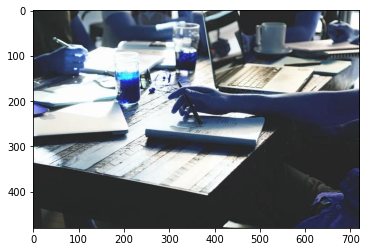

In [ ]:
#Display the loaded image

plt.imshow(image)
#plt.show()

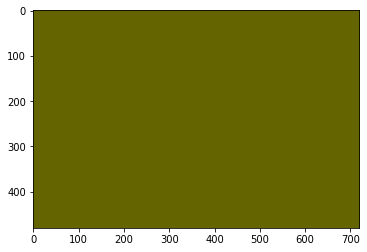

In [ ]:
# Create black image
black_image = np.zeros((height, width, 3), np.uint8)
black_image[:] = (100, 100, 0)
plt.imshow(black_image)

In [ ]:
# Detect objects
detect_objects = cv2.dnn.blobFromImage(image, swapRB=True)
net.setInput(detect_objects)

boxes, masks = net.forward(["detection_out_final", "detection_masks"])
count_detection = boxes.shape[2]

In [ ]:
for i in range(count_detection):
	box_object = boxes[0, 0, i]
	class_id = box_object[1]
	score = box_object[2]
	if score < 0.5:
		continue

	# Get box Coordinates for each object
	a1 = int(box_object[3] * width)
	b1 = int(box_object[4] * height)
	a2 = int(box_object[5] * width)
	b2 = int(box_object[6] * height)

	roi = black_image[b1: b2, a1: a2]
	roi_height, roi_width, _ = roi.shape

	# Get the mask
	mask = masks[i, int(class_id)]
	mask = cv2.resize(mask, (roi_width, roi_height))
	_, mask = cv2.threshold(mask, 0.5, 255, cv2.THRESH_BINARY)

	cv2.rectangle(image, (a1, b1), (a2, b2), (255, 0, 0), 3)

	# Get mask coordinates
	contours, _ = cv2.findContours(np.array(mask, np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
	color = colors[int(class_id)]
	for cnt in contours:
		cv2.fillPoly(roi, [cnt], (int(color[0]), int(color[1]), int(color[2])))
	

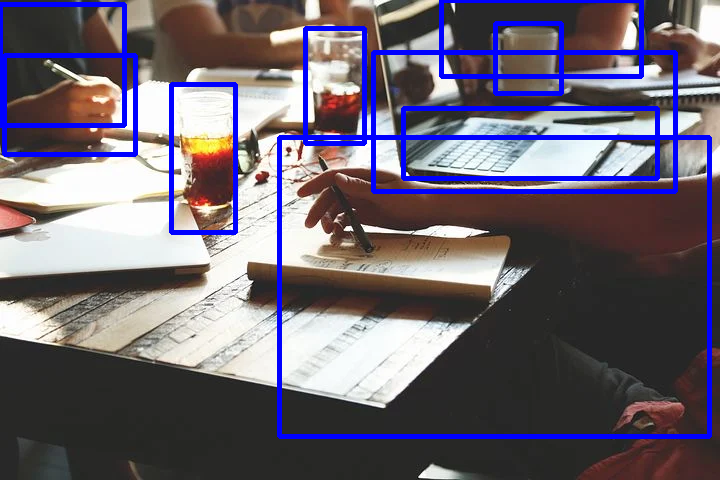

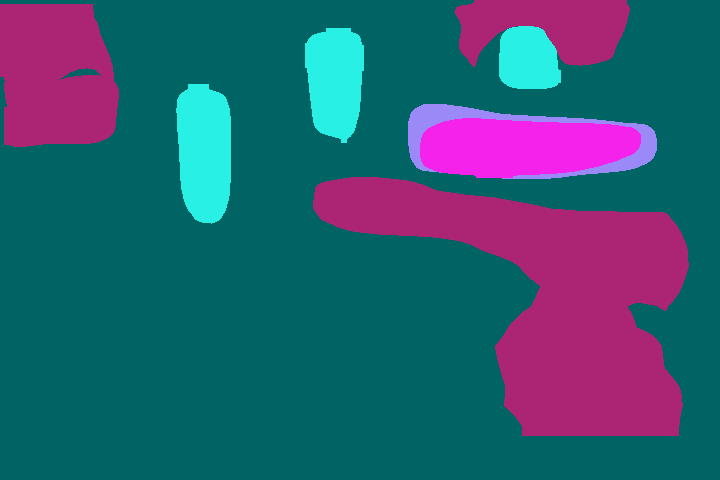

-1

In [ ]:
# Displaying the segmented images
from google.colab.patches import cv2_imshow
cv2_imshow(image)
cv2_imshow(black_image)
cv2.waitKey(0)